<h1 style="text-align:center">Universidade Federal da Bahia</h1>
<h2 style="text-align:center">Departamento de Ciencia da Computação</h2>
<h3 style="text-align:center">Banco de dados - MATA60</h3>
<h3 style="text-align:center">Profª. Drª Vaninha Vieira</h3>

<h1 style="text-align:center">Mineração de dados</h1>

<p style="font-size:18px">Mineração de dados (também conhecida pelo termo inglês data mining) é o processo de explorar grandes quantidades de dados à procura de padrões consistentes, como regras de associação ou sequências temporais, para detectar relacionamentos sistemáticos entre variáveis, detectando assim novos subconjuntos de dados.</p>
<p style="text-align:right">Origem: Wikipédia, a enciclopédia livre.</p>


<h1 style="text-align:center">Mas o que são grandes quantidades de dados?</h1>

<p style="font-size:18px">Simplificando, big data é um conjunto de dados maior e mais complexo, especialmente de novas fontes de dados. Esses conjuntos de dados são tão volumosos que o software tradicional de processamento de dados simplesmente não consegue gerenciá-los. Mas esses enormes volumes de dados podem ser usados para resolver problemas de negócios que você não conseguiria resolver antes.</p>
<p style="text-align:right">Origem: Oracle.</p>

<h1 style="text-align:center">Antes de tudo entenda os dados!</h1>

<p style="font-size:18px">Qual o objetivo?</p>

<h1>Seleção das bases</h1>

<p style="font-size:18px">Os datasets utilizados neste trabalho foram obtidos no portal <a src="http://dados.gov.br">dados.gov.br</a><p/>
<p style="font-size:18px">Apó a seleção das bases a primeira coisa que deve ser realizada, simplesmente é dar uma olhada no dados, abrir e entender como os dados estão estruturados e se eles atendem as necessidade de seu estudo<p/>

<h1>Proposta para os dados</h1>
<p style="font-size:18px">Gerar informação sobre US(Unidades de Saúde) de forma que possa ser analisada e exibido informações sobre a qualidade de insumos, qualidade estrutural e equipamentos <p/>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from unidecode import unidecode
import re

In [2]:
localizacaoCNES = pd.read_csv('cnesnone.csv',sep=',')
CNESativos = pd.read_csv('cnes_ativonone.csv',sep=',')
descricaoSuprimentoUBS = pd.read_csv('ubs.csv',sep=',')

In [3]:
localizacaoCNES

,co_cnes,co_ibge,origem_dado,data_atualizacao,lat,long
0,2684403,412510,PMAQ,2015-05-27,-25.683000,-50.297000
1,2684411,412510,PMAQ,2015-05-27,-25.655072,-50.393236
2,2684438,412510,PMAQ,2015-05-27,-25.687762,-50.301397
3,2576694,412520,PMAQ,2015-05-27,-25.706000,-52.918000
4,2583372,412520,PMAQ,2015-05-27,-25.706000,-52.918000
5,2584360,412520,PMAQ,2015-05-27,-25.714948,-52.920103
6,2584379,412520,PMAQ,2015-05-27,-25.690831,-52.854517
7,2584387,412520,PMAQ,2015-05-27,-25.777091,-52.917538
8,6412254,412520,PMAQ,2015-05-27,-25.714948,-52.920103
9,6653375,412520,PMAQ,2015-05-27,-25.716645,-52.920520


In [4]:
CNESativos

,co_cnes,co_ibge,no_fantasia,ds_tipo_unidade,tp_gestao,no_logradouro,nu_endereco,no_bairro,co_cep,uf,municipio,nu_telefone
0,6577687,292240,SECRETARIA DE SAUDE DE MUTUIPE,CENTRAL DE GESTAO EM SAUDE,M,RUA RUY BARBOSA,S/N,CENTRO,45480000,BA,Mutuípe,NaN
1,6578500,500210,REABILIT CONSULTORIO DE FISIOTERAPIA,CLINICA/CENTRO DE ESPECIALIDADE,M,ALMIRANTE BARROSO,S/N,CENTRO,79260000,MS,Bela Vista,NaN
2,6577725,355660,SECRETARIA MUNICIPAL DE SAUDE E HIGIENE DE VER...,CENTRAL DE GESTAO EM SAUDE,M,RUA PAULO GUERREIRO FRANCO,997,CENTRO,17560000,SP,Vera Cruz,NaN
3,6577733,355410,CONS SERGIO LUIZ TEIXEIRA M PERES,CONSULTORIO ISOLADO,M,PCA MONS SILVA BARROS,254,CENTRO,12020070,SP,Taubaté,36351489
4,6577768,410490,LABORATORIO DOFF SOTTA,UNIDADE DE APOIO DIAGNOSE E TERAPIA (SADT ISOL...,M,RUA DR JORGE XAVIER DA SILVA,1078,CENTRO,84165000,PR,Castro,3232-4854
5,6577806,420245,SAMU BOMBINHAS,UNIDADE MOVEL DE NIVEL PRE-HOSPITALAR NA AREA ...,M,RUA CACHALOTE,589,MORRINHOS,88215000,SC,Bombinhas,33934363
6,6577830,240260,CENTRO DE ATENCAO PSICOSSOCIAL CAPS II,CENTRO DE ATENCAO PSICOSSOCIAL,M,RUA POETISA DOLORES,13,CENTRO,59570000,RN,Ceará-Mirim,(84)3274-5914
7,6577865,315960,DIMENSAO CLINICA MEDICA,UNIDADE DE APOIO DIAGNOSE E TERAPIA (SADT ISOL...,M,RUA CEL GABRIEL CAPISTRANO,256,CENTRO,37540000,MG,Santa Rita do Sapucaí,3534713531
8,6577873,355670,JULIANA PEREIRA PERSI,UNIDADE DE APOIO DIAGNOSE E TERAPIA (SADT ISOL...,M,RUA ROCINHA,213,CAPELA,13280000,SP,Vinhedo,38764932
9,6577881,231330,CENTRAL DE CONSULTORIOS,CLINICA/CENTRO DE ESPECIALIDADE,M,RUA MAFISA CIDRAO ROCHA,63,CENTRO,63660000,CE,Tauá,88-34371097


In [5]:
descricaoSuprimentoUBS

,vlr_latitude,vlr_longitude,cod_munic,cod_cnes,nom_estab,dsc_endereco,dsc_bairro,dsc_cidade,dsc_telefone,dsc_estrut_fisic_ambiencia,dsc_adap_defic_fisic_idosos,dsc_equipamentos,dsc_medicamentos
0,-10.911237,-37.062078,280030,3492,US OSWALDO DE SOUZA,TV ADALTO BOTELHO,GETULIO VARGAS,Aracaju,7931791326,Desempenho acima da média,Desempenho muito acima da média,Desempenho mediano ou um pouco abaixo da média,Desempenho acima da média
1,-9.485943,-35.857573,270770,6685315,USF ENFERMEIRO PEDRO JACINTO AREA 09,R 15 DE AGOSTO,CENTRO,Rio Largo,Não se aplica,Desempenho mediano ou um pouco abaixo da média,Desempenho mediano ou um pouco abaixo da média,Desempenho mediano ou um pouco abaixo da média,Desempenho mediano ou um pouco abaixo da média
2,-23.896000,-53.410000,411885,6811299,UNIDADE DE ATENCAO PRIMARIA SAUDE DA FAMILIA,RUA GUILHERME BRUXEL,CENTRO,Perobal,4436251462,Desempenho muito acima da média,Desempenho muito acima da média,Desempenho mediano ou um pouco abaixo da média,Desempenho muito acima da média
3,-16.447874,-41.009860,313580,6335616,POSTO DE SAUDE DE BOM JESUS DA ALDEIA,RUA TEOFILO OTONI,ALDEIA,Jequitinhonha,3337411423,Desempenho mediano ou um pouco abaixo da média,Desempenho acima da média,Desempenho mediano ou um pouco abaixo da média,Desempenho mediano ou um pouco abaixo da média
4,-6.573311,-35.107605,250930,6662226,POSTO ANCORA URUBA,RODOVIA PB N 065,SITIO,Mataraca,Não se aplica,Desempenho acima da média,Desempenho acima da média,Desempenho mediano ou um pouco abaixo da média,Desempenho mediano ou um pouco abaixo da média
5,-7.037151,-37.288799,251080,6713971,UNIDADE DE SAUDE DA FAMILIA ANA RAQUEL,RUA SEVERINO SOARES,JD GUANABARA,Patos,Não se aplica,Desempenho mediano ou um pouco abaixo da média,Desempenho mediano ou um pouco abaixo da média,Desempenho mediano ou um pouco abaixo da média,Desempenho mediano ou um pouco abaixo da média
6,-5.998857,-40.293689,231330,3322076,PSF ODILON AGUIAR,RUA DOMINGAS GOMES,CENTRO,Tauá,(88)4373850,Desempenho mediano ou um pouco abaixo da média,Desempenho mediano ou um pouco abaixo da média,Desempenho mediano ou um pouco abaixo da média,Desempenho acima da média
7,-24.582113,-49.435494,412863,6749836,UAPSF PROF HETTY ROSA DE MOURA E COSTA,AVENIDA EZIDIO NEVES,CERRADO,Doutor Ulysses,4136641208,Desempenho muito acima da média,Desempenho muito acima da média,Desempenho acima da média,Desempenho acima da média
8,-5.897952,-44.816000,211230,2450801,UNIDADE BASICA DE SAUDE JOSE BIBI,POVOADO SAO JOAQUIM DOS MELOS,ZONA RURAL,Tuntum,9935225071,Desempenho mediano ou um pouco abaixo da média,Desempenho mediano ou um pouco abaixo da média,Desempenho mediano ou um pouco abaixo da média,Desempenho mediano ou um pouco abaixo da média
9,-9.557891,-37.383213,270840,6461689,USF NOSSA SENHORA DO BOM PARTO,RUA AFONSO SOARES VIEIRA,CENTRO,São José da Tapera,Não se aplica,Desempenho mediano ou um pouco abaixo da média,Desempenho acima da média,Desempenho mediano ou um pouco abaixo da média,Desempenho mediano ou um pouco abaixo da média


<h1>Seleção dos dados</h1>
<p style="font-size:18px">É processo de eleição dos dados contidos nos datasets, essa fase é muito importante por que é o momento em que as variaveis que formarão o subset de dados para o processo de mineração serão definidas. Geralmente esses dados são apontados por um especialista de dominio.<p/>

In [6]:
localizacaoCNESFiltrado = localizacaoCNES[['co_cnes','co_ibge','lat','long']].copy()

In [7]:
CNESativosFiltrado = CNESativos[['co_cnes','co_ibge','no_fantasia','ds_tipo_unidade','no_logradouro','nu_endereco','no_bairro','co_cep','uf','municipio']].copy()

In [8]:
descricaoSuprimentoUBSFiltrado = descricaoSuprimentoUBS[['cod_munic','cod_cnes','nom_estab','dsc_endereco','dsc_bairro','dsc_cidade','dsc_estrut_fisic_ambiencia','dsc_adap_defic_fisic_idosos','dsc_equipamentos','dsc_medicamentos']].copy()

In [9]:
localizacaoCNESFiltrado

,co_cnes,co_ibge,lat,long
0,2684403,412510,-25.683000,-50.297000
1,2684411,412510,-25.655072,-50.393236
2,2684438,412510,-25.687762,-50.301397
3,2576694,412520,-25.706000,-52.918000
4,2583372,412520,-25.706000,-52.918000
5,2584360,412520,-25.714948,-52.920103
6,2584379,412520,-25.690831,-52.854517
7,2584387,412520,-25.777091,-52.917538
8,6412254,412520,-25.714948,-52.920103
9,6653375,412520,-25.716645,-52.920520


In [10]:
CNESativosFiltrado

,co_cnes,co_ibge,no_fantasia,ds_tipo_unidade,no_logradouro,nu_endereco,no_bairro,co_cep,uf,municipio
0,6577687,292240,SECRETARIA DE SAUDE DE MUTUIPE,CENTRAL DE GESTAO EM SAUDE,RUA RUY BARBOSA,S/N,CENTRO,45480000,BA,Mutuípe
1,6578500,500210,REABILIT CONSULTORIO DE FISIOTERAPIA,CLINICA/CENTRO DE ESPECIALIDADE,ALMIRANTE BARROSO,S/N,CENTRO,79260000,MS,Bela Vista
2,6577725,355660,SECRETARIA MUNICIPAL DE SAUDE E HIGIENE DE VER...,CENTRAL DE GESTAO EM SAUDE,RUA PAULO GUERREIRO FRANCO,997,CENTRO,17560000,SP,Vera Cruz
3,6577733,355410,CONS SERGIO LUIZ TEIXEIRA M PERES,CONSULTORIO ISOLADO,PCA MONS SILVA BARROS,254,CENTRO,12020070,SP,Taubaté
4,6577768,410490,LABORATORIO DOFF SOTTA,UNIDADE DE APOIO DIAGNOSE E TERAPIA (SADT ISOL...,RUA DR JORGE XAVIER DA SILVA,1078,CENTRO,84165000,PR,Castro
5,6577806,420245,SAMU BOMBINHAS,UNIDADE MOVEL DE NIVEL PRE-HOSPITALAR NA AREA ...,RUA CACHALOTE,589,MORRINHOS,88215000,SC,Bombinhas
6,6577830,240260,CENTRO DE ATENCAO PSICOSSOCIAL CAPS II,CENTRO DE ATENCAO PSICOSSOCIAL,RUA POETISA DOLORES,13,CENTRO,59570000,RN,Ceará-Mirim
7,6577865,315960,DIMENSAO CLINICA MEDICA,UNIDADE DE APOIO DIAGNOSE E TERAPIA (SADT ISOL...,RUA CEL GABRIEL CAPISTRANO,256,CENTRO,37540000,MG,Santa Rita do Sapucaí
8,6577873,355670,JULIANA PEREIRA PERSI,UNIDADE DE APOIO DIAGNOSE E TERAPIA (SADT ISOL...,RUA ROCINHA,213,CAPELA,13280000,SP,Vinhedo
9,6577881,231330,CENTRAL DE CONSULTORIOS,CLINICA/CENTRO DE ESPECIALIDADE,RUA MAFISA CIDRAO ROCHA,63,CENTRO,63660000,CE,Tauá


In [11]:
descricaoSuprimentoUBSFiltrado

,cod_munic,cod_cnes,nom_estab,dsc_endereco,dsc_bairro,dsc_cidade,dsc_estrut_fisic_ambiencia,dsc_adap_defic_fisic_idosos,dsc_equipamentos,dsc_medicamentos
0,280030,3492,US OSWALDO DE SOUZA,TV ADALTO BOTELHO,GETULIO VARGAS,Aracaju,Desempenho acima da média,Desempenho muito acima da média,Desempenho mediano ou um pouco abaixo da média,Desempenho acima da média
1,270770,6685315,USF ENFERMEIRO PEDRO JACINTO AREA 09,R 15 DE AGOSTO,CENTRO,Rio Largo,Desempenho mediano ou um pouco abaixo da média,Desempenho mediano ou um pouco abaixo da média,Desempenho mediano ou um pouco abaixo da média,Desempenho mediano ou um pouco abaixo da média
2,411885,6811299,UNIDADE DE ATENCAO PRIMARIA SAUDE DA FAMILIA,RUA GUILHERME BRUXEL,CENTRO,Perobal,Desempenho muito acima da média,Desempenho muito acima da média,Desempenho mediano ou um pouco abaixo da média,Desempenho muito acima da média
3,313580,6335616,POSTO DE SAUDE DE BOM JESUS DA ALDEIA,RUA TEOFILO OTONI,ALDEIA,Jequitinhonha,Desempenho mediano ou um pouco abaixo da média,Desempenho acima da média,Desempenho mediano ou um pouco abaixo da média,Desempenho mediano ou um pouco abaixo da média
4,250930,6662226,POSTO ANCORA URUBA,RODOVIA PB N 065,SITIO,Mataraca,Desempenho acima da média,Desempenho acima da média,Desempenho mediano ou um pouco abaixo da média,Desempenho mediano ou um pouco abaixo da média
5,251080,6713971,UNIDADE DE SAUDE DA FAMILIA ANA RAQUEL,RUA SEVERINO SOARES,JD GUANABARA,Patos,Desempenho mediano ou um pouco abaixo da média,Desempenho mediano ou um pouco abaixo da média,Desempenho mediano ou um pouco abaixo da média,Desempenho mediano ou um pouco abaixo da média
6,231330,3322076,PSF ODILON AGUIAR,RUA DOMINGAS GOMES,CENTRO,Tauá,Desempenho mediano ou um pouco abaixo da média,Desempenho mediano ou um pouco abaixo da média,Desempenho mediano ou um pouco abaixo da média,Desempenho acima da média
7,412863,6749836,UAPSF PROF HETTY ROSA DE MOURA E COSTA,AVENIDA EZIDIO NEVES,CERRADO,Doutor Ulysses,Desempenho muito acima da média,Desempenho muito acima da média,Desempenho acima da média,Desempenho acima da média
8,211230,2450801,UNIDADE BASICA DE SAUDE JOSE BIBI,POVOADO SAO JOAQUIM DOS MELOS,ZONA RURAL,Tuntum,Desempenho mediano ou um pouco abaixo da média,Desempenho mediano ou um pouco abaixo da média,Desempenho mediano ou um pouco abaixo da média,Desempenho mediano ou um pouco abaixo da média
9,270840,6461689,USF NOSSA SENHORA DO BOM PARTO,RUA AFONSO SOARES VIEIRA,CENTRO,São José da Tapera,Desempenho mediano ou um pouco abaixo da média,Desempenho acima da média,Desempenho mediano ou um pouco abaixo da média,Desempenho mediano ou um pouco abaixo da média


<h1>Normas de representação e Padronização</h1>
<p style="font-size:18px">Neste passo é definido os nome que as variáveis terão e seus padrões de representação. Logo em seguida isso é aplicado em todos os datasets para facilitar o processo de mineração.<p/>

In [12]:
descricaoSuprimentoUBSFiltrado = descricaoSuprimentoUBSFiltrado.rename(index=str, columns={"cod_munic":"co_munic","cod_cnes":"co_cnes","nom_estab":"no_fantasia","dsc_endereco":"no_logradouro","dsc_bairro":"no_bairro","dsc_cidade":"municipio"})

In [13]:
descricaoSuprimentoUBSFiltrado

,co_munic,co_cnes,no_fantasia,no_logradouro,no_bairro,municipio,dsc_estrut_fisic_ambiencia,dsc_adap_defic_fisic_idosos,dsc_equipamentos,dsc_medicamentos
0,280030,3492,US OSWALDO DE SOUZA,TV ADALTO BOTELHO,GETULIO VARGAS,Aracaju,Desempenho acima da média,Desempenho muito acima da média,Desempenho mediano ou um pouco abaixo da média,Desempenho acima da média
1,270770,6685315,USF ENFERMEIRO PEDRO JACINTO AREA 09,R 15 DE AGOSTO,CENTRO,Rio Largo,Desempenho mediano ou um pouco abaixo da média,Desempenho mediano ou um pouco abaixo da média,Desempenho mediano ou um pouco abaixo da média,Desempenho mediano ou um pouco abaixo da média
2,411885,6811299,UNIDADE DE ATENCAO PRIMARIA SAUDE DA FAMILIA,RUA GUILHERME BRUXEL,CENTRO,Perobal,Desempenho muito acima da média,Desempenho muito acima da média,Desempenho mediano ou um pouco abaixo da média,Desempenho muito acima da média
3,313580,6335616,POSTO DE SAUDE DE BOM JESUS DA ALDEIA,RUA TEOFILO OTONI,ALDEIA,Jequitinhonha,Desempenho mediano ou um pouco abaixo da média,Desempenho acima da média,Desempenho mediano ou um pouco abaixo da média,Desempenho mediano ou um pouco abaixo da média
4,250930,6662226,POSTO ANCORA URUBA,RODOVIA PB N 065,SITIO,Mataraca,Desempenho acima da média,Desempenho acima da média,Desempenho mediano ou um pouco abaixo da média,Desempenho mediano ou um pouco abaixo da média
5,251080,6713971,UNIDADE DE SAUDE DA FAMILIA ANA RAQUEL,RUA SEVERINO SOARES,JD GUANABARA,Patos,Desempenho mediano ou um pouco abaixo da média,Desempenho mediano ou um pouco abaixo da média,Desempenho mediano ou um pouco abaixo da média,Desempenho mediano ou um pouco abaixo da média
6,231330,3322076,PSF ODILON AGUIAR,RUA DOMINGAS GOMES,CENTRO,Tauá,Desempenho mediano ou um pouco abaixo da média,Desempenho mediano ou um pouco abaixo da média,Desempenho mediano ou um pouco abaixo da média,Desempenho acima da média
7,412863,6749836,UAPSF PROF HETTY ROSA DE MOURA E COSTA,AVENIDA EZIDIO NEVES,CERRADO,Doutor Ulysses,Desempenho muito acima da média,Desempenho muito acima da média,Desempenho acima da média,Desempenho acima da média
8,211230,2450801,UNIDADE BASICA DE SAUDE JOSE BIBI,POVOADO SAO JOAQUIM DOS MELOS,ZONA RURAL,Tuntum,Desempenho mediano ou um pouco abaixo da média,Desempenho mediano ou um pouco abaixo da média,Desempenho mediano ou um pouco abaixo da média,Desempenho mediano ou um pouco abaixo da média
9,270840,6461689,USF NOSSA SENHORA DO BOM PARTO,RUA AFONSO SOARES VIEIRA,CENTRO,São José da Tapera,Desempenho mediano ou um pouco abaixo da média,Desempenho acima da média,Desempenho mediano ou um pouco abaixo da média,Desempenho mediano ou um pouco abaixo da média


<p style="font-size:18px">Agora é definido que todos os dados do tipo string devem ser maiúsculos sem acentos e sem caracteres especiais.<p/>

In [14]:
CNESativosFiltrado = CNESativosFiltrado.apply(lambda x: x.astype(str).str.upper())
descricaoSuprimentoUBSFiltrado = descricaoSuprimentoUBSFiltrado.apply(lambda x: x.astype(str).str.upper())

In [15]:
CNESativosFiltrado = CNESativosFiltrado.apply(lambda x: x.str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8'))
descricaoSuprimentoUBSFiltrado = descricaoSuprimentoUBSFiltrado.apply(lambda x: x.str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8'))

<p style="font-size:18px">Após o processo de limpeza dos dados os datasets são salvos para o processo de linkage dos dados.<p/>

In [16]:
descricaoSuprimentoUBSFiltrado

,co_munic,co_cnes,no_fantasia,no_logradouro,no_bairro,municipio,dsc_estrut_fisic_ambiencia,dsc_adap_defic_fisic_idosos,dsc_equipamentos,dsc_medicamentos
0,280030,3492,US OSWALDO DE SOUZA,TV ADALTO BOTELHO,GETULIO VARGAS,ARACAJU,DESEMPENHO ACIMA DA MEDIA,DESEMPENHO MUITO ACIMA DA MEDIA,DESEMPENHO MEDIANO OU UM POUCO ABAIXO DA MEDIA,DESEMPENHO ACIMA DA MEDIA
1,270770,6685315,USF ENFERMEIRO PEDRO JACINTO AREA 09,R 15 DE AGOSTO,CENTRO,RIO LARGO,DESEMPENHO MEDIANO OU UM POUCO ABAIXO DA MEDIA,DESEMPENHO MEDIANO OU UM POUCO ABAIXO DA MEDIA,DESEMPENHO MEDIANO OU UM POUCO ABAIXO DA MEDIA,DESEMPENHO MEDIANO OU UM POUCO ABAIXO DA MEDIA
2,411885,6811299,UNIDADE DE ATENCAO PRIMARIA SAUDE DA FAMILIA,RUA GUILHERME BRUXEL,CENTRO,PEROBAL,DESEMPENHO MUITO ACIMA DA MEDIA,DESEMPENHO MUITO ACIMA DA MEDIA,DESEMPENHO MEDIANO OU UM POUCO ABAIXO DA MEDIA,DESEMPENHO MUITO ACIMA DA MEDIA
3,313580,6335616,POSTO DE SAUDE DE BOM JESUS DA ALDEIA,RUA TEOFILO OTONI,ALDEIA,JEQUITINHONHA,DESEMPENHO MEDIANO OU UM POUCO ABAIXO DA MEDIA,DESEMPENHO ACIMA DA MEDIA,DESEMPENHO MEDIANO OU UM POUCO ABAIXO DA MEDIA,DESEMPENHO MEDIANO OU UM POUCO ABAIXO DA MEDIA
4,250930,6662226,POSTO ANCORA URUBA,RODOVIA PB N 065,SITIO,MATARACA,DESEMPENHO ACIMA DA MEDIA,DESEMPENHO ACIMA DA MEDIA,DESEMPENHO MEDIANO OU UM POUCO ABAIXO DA MEDIA,DESEMPENHO MEDIANO OU UM POUCO ABAIXO DA MEDIA
5,251080,6713971,UNIDADE DE SAUDE DA FAMILIA ANA RAQUEL,RUA SEVERINO SOARES,JD GUANABARA,PATOS,DESEMPENHO MEDIANO OU UM POUCO ABAIXO DA MEDIA,DESEMPENHO MEDIANO OU UM POUCO ABAIXO DA MEDIA,DESEMPENHO MEDIANO OU UM POUCO ABAIXO DA MEDIA,DESEMPENHO MEDIANO OU UM POUCO ABAIXO DA MEDIA
6,231330,3322076,PSF ODILON AGUIAR,RUA DOMINGAS GOMES,CENTRO,TAUA,DESEMPENHO MEDIANO OU UM POUCO ABAIXO DA MEDIA,DESEMPENHO MEDIANO OU UM POUCO ABAIXO DA MEDIA,DESEMPENHO MEDIANO OU UM POUCO ABAIXO DA MEDIA,DESEMPENHO ACIMA DA MEDIA
7,412863,6749836,UAPSF PROF HETTY ROSA DE MOURA E COSTA,AVENIDA EZIDIO NEVES,CERRADO,DOUTOR ULYSSES,DESEMPENHO MUITO ACIMA DA MEDIA,DESEMPENHO MUITO ACIMA DA MEDIA,DESEMPENHO ACIMA DA MEDIA,DESEMPENHO ACIMA DA MEDIA
8,211230,2450801,UNIDADE BASICA DE SAUDE JOSE BIBI,POVOADO SAO JOAQUIM DOS MELOS,ZONA RURAL,TUNTUM,DESEMPENHO MEDIANO OU UM POUCO ABAIXO DA MEDIA,DESEMPENHO MEDIANO OU UM POUCO ABAIXO DA MEDIA,DESEMPENHO MEDIANO OU UM POUCO ABAIXO DA MEDIA,DESEMPENHO MEDIANO OU UM POUCO ABAIXO DA MEDIA
9,270840,6461689,USF NOSSA SENHORA DO BOM PARTO,RUA AFONSO SOARES VIEIRA,CENTRO,SAO JOSE DA TAPERA,DESEMPENHO MEDIANO OU UM POUCO ABAIXO DA MEDIA,DESEMPENHO ACIMA DA MEDIA,DESEMPENHO MEDIANO OU UM POUCO ABAIXO DA MEDIA,DESEMPENHO MEDIANO OU UM POUCO ABAIXO DA MEDIA


In [17]:
localizacaoCNESFiltrado.to_csv('localizacaoCNESFiltrado.csv',sep=',')
CNESativosFiltrado.to_csv('CNESativosFiltrado.csv',sep=',')
descricaoSuprimentoUBSFiltrado.to_csv('descricaoSuprimentoUBSFiltrado.csv',sep=',')

<h1>Mineração</h1>

<h1>Pós-processamento</h1>

In [17]:
linkageDataset = pd.read_csv('linkage2.csv',sep=',')

In [20]:
estados = linkageDataset['uf'].value_counts().index.tolist()

In [21]:
estados

['MG',
 'SP',
 'BA',
 'RS',
 'PR',
 'PE',
 'CE',
 'MA',
 'RJ',
 'SC',
 'PB',
 'PA',
 'PI',
 'RN',
 'GO',
 'ES',
 'AL',
 'MT',
 'SE',
 'MS',
 'AM',
 'RO',
 'TO',
 'AP',
 'AC',
 'RR',
 'DF']

In [23]:
estados = pd.DataFrame({'Estados':estados})

In [25]:
estados

,Estados
0,MG
1,SP
2,BA
3,RS
4,PR
5,PE
6,CE
7,MA
8,RJ
9,SC


In [29]:
estados.to_json(path_or_buf='estados.json',orient='records')

In [19]:
linkageDataset.to_json(path_or_buf='linkage.json',orient='records')

<h1>Quantidade de unidades de saúde ativas com dados de qualidade de serviço por unidade federativa até 12 de junho de 2018</h1>
<h2>Total de 30000 registros</h2>

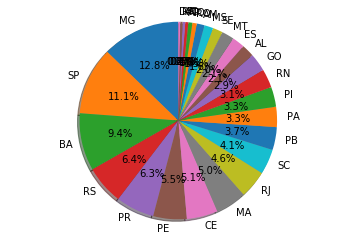

In [33]:
sizes = linkageDataset['uf'].value_counts()
labels = sizes.index.tolist()
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

<h1>Quantidade de unidades de saúde ativas no brasil adaptadas para o atendimento de pessoas idosas e deficientes físicos 12 de junho de 2018</h1>
<h2>Total de 30000 registros</h2>

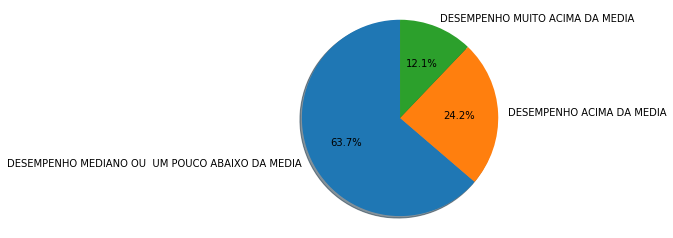

In [21]:
sizes = linkageDataset['dsc_adap_defic_fisic_idosos'].value_counts()
labels = sizes.index.tolist()
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

<h1>Realizando um recorte da Bahia</h1>

In [22]:
ba = linkageDataset[linkageDataset['uf'] == 'BA']

In [23]:
ba

,Match_Status,Score,Class,Linkage_ID,co_munic,co_cnes,no_fantasia,no_logradouro,no_bairro,municipio,...,dsc_adap_defic_fisic_idosos,dsc_equipamentos,dsc_medicamentos,co_ibge,ds_tipo_unidade,nu_endereco,co_cep,uf,lat,long
104,3,15.8,1,105,290380,2384957,POSTO DE SAUDE DE CANABRAVA,CANABRAVA,ZONA RURAL,BOA VISTA DO TUPIM,...,DESEMPENHO MEDIANO OU UM POUCO ABAIXO DA MEDIA,DESEMPENHO MEDIANO OU UM POUCO ABAIXO DA MEDIA,DESEMPENHO MEDIANO OU UM POUCO ABAIXO DA MEDIA,290380,POSTO DE SAUDE,S/N,46850000,BA,-13.037735,-40.749364
105,3,15.8,1,106,290380,2384973,POSTO DE SAUDE DE SANTA LUZIA,POV DE SANTA LUZIA,ZONA RURAL,BOA VISTA DO TUPIM,...,DESEMPENHO MEDIANO OU UM POUCO ABAIXO DA MEDIA,DESEMPENHO MEDIANO OU UM POUCO ABAIXO DA MEDIA,DESEMPENHO MEDIANO OU UM POUCO ABAIXO DA MEDIA,290380,POSTO DE SAUDE,S/N,46850000,BA,-12.978587,-40.947633
106,3,15.8,1,107,290380,2384892,UNIDADE DE SAUDE DA FAMILIA BAIXIO,POV DO BAIXIO,ZONA RURAL,BOA VISTA DO TUPIM,...,DESEMPENHO MEDIANO OU UM POUCO ABAIXO DA MEDIA,DESEMPENHO MEDIANO OU UM POUCO ABAIXO DA MEDIA,DESEMPENHO ACIMA DA MEDIA,290380,CENTRO DE SAUDE/UNIDADE BASICA,S/N,46850000,BA,-12.661322,-40.605743
107,3,15.8,1,108,290323,2384523,UNIDADE BASICA DE SAUDE DE BARRO ALTO,RUA MIGUEL MARQUES,CENTRO,BARRO ALTO,...,DESEMPENHO MEDIANO OU UM POUCO ABAIXO DA MEDIA,DESEMPENHO MEDIANO OU UM POUCO ABAIXO DA MEDIA,DESEMPENHO MUITO ACIMA DA MEDIA,290323,CENTRO DE SAUDE/UNIDADE BASICA,S/N,44895000,BA,-11.761905,-41.907885
110,3,15.8,1,111,290380,2384310,UNIDADE DE SAUDE DA FAMILIA BEIRA RIO,ASSENTAMENTO BEIRA RIO,ZONA RURAL,BOA VISTA DO TUPIM,...,DESEMPENHO MEDIANO OU UM POUCO ABAIXO DA MEDIA,DESEMPENHO MEDIANO OU UM POUCO ABAIXO DA MEDIA,DESEMPENHO ACIMA DA MEDIA,290380,CENTRO DE SAUDE/UNIDADE BASICA,S/N,46850000,BA,-12.998135,-40.578797
111,3,15.8,1,112,290265,2384434,CENTRO DE SAUDE NOSSA SENHORA DA CONCEICAO,AVENIDA EMANCIPACAO,CENTRO,BANZAE,...,DESEMPENHO MUITO ACIMA DA MEDIA,DESEMPENHO MEDIANO OU UM POUCO ABAIXO DA MEDIA,DESEMPENHO MUITO ACIMA DA MEDIA,290265,CENTRO DE SAUDE/UNIDADE BASICA,S/N,48405000,BA,-10.583911,-38.612137
112,3,15.8,1,113,290280,2384442,CENTRO DE SAUDE,R PADRE GASPAR BERTONNI,RUA NOVA,BARRA DA ESTIVA,...,DESEMPENHO ACIMA DA MEDIA,DESEMPENHO MEDIANO OU UM POUCO ABAIXO DA MEDIA,DESEMPENHO MEDIANO OU UM POUCO ABAIXO DA MEDIA,290280,CENTRO DE SAUDE/UNIDADE BASICA,S/N,46650000,BA,-13.629613,-41.333141
113,3,15.8,1,114,290380,2384345,POSTO DE SAUDE DE BARRA VERDE,ASSENTAMENTO BARRA VERDE,ZONARURAL,BOA VISTA DO TUPIM,...,DESEMPENHO MEDIANO OU UM POUCO ABAIXO DA MEDIA,DESEMPENHO MEDIANO OU UM POUCO ABAIXO DA MEDIA,DESEMPENHO MEDIANO OU UM POUCO ABAIXO DA MEDIA,290380,POSTO DE SAUDE,S/N,46850000,BA,-12.749910,-40.814280
114,3,15.8,1,115,290310,2384507,UNIDADE DE SAUDE DA FAMILIA ALOISIO SOUZA OLIV...,RUA EDGAR BENTO,CENTRO,BARRA DO ROCHA,...,DESEMPENHO ACIMA DA MEDIA,DESEMPENHO MEDIANO OU UM POUCO ABAIXO DA MEDIA,DESEMPENHO MEDIANO OU UM POUCO ABAIXO DA MEDIA,290310,CENTRO DE SAUDE/UNIDADE BASICA,S/N,45560000,BA,-14.210029,-39.601386
115,3,15.8,1,116,290280,2384493,USF PASSAGEM DE SANTANA,POVOADO DE PASSAGEM DE SANTANA,ZONA RURAL,BARRA DA ESTIVA,...,DESEMPENHO MEDIANO OU UM POUCO ABAIXO DA MEDIA,DESEMPENHO MEDIANO OU UM POUCO ABAIXO DA MEDIA,DESEMPENHO MUITO ACIMA DA MEDIA,290280,CENTRO DE SAUDE/UNIDADE BASICA,S/N,46650000,BA,-13.612960,-41.323290


<h1>Quantidade de unidades de saúde ativas na Bahia adaptadas para o atendimento de pessoas idosas e deficientes físicos até 15 de Agosto de 2016</h1>
<h2>Total de 2825 registros</h2>

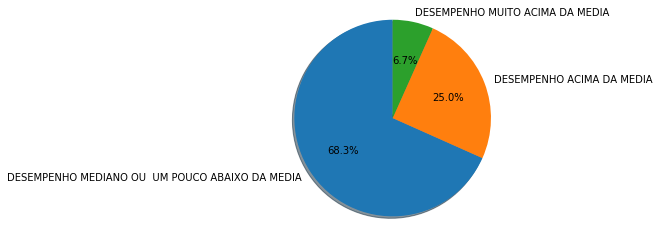

In [30]:
sizes = ba['dsc_adap_defic_fisic_idosos'].value_counts()
labels = sizes.index.tolist()
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [30]:
x = 10

In [31]:
x

10

$$\sum(i = 1)^N{x_i}$$